# Homework 4: Data Visualization
- **Name**:  Bhanupriya Narumalla
- **UB Username**: bnarumal
- **UB Person Number**: 50478806

---
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [3]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
import pandas as pd
import matplotlib.pyplot as plt
df_scatter = pd.read_csv("C:\\Users\Ganesha\Downloads\scatter_data.csv")

x_value = df_scatter.iloc[:, 0].to_list()
y_value = df_scatter.iloc[:, 1].to_list()


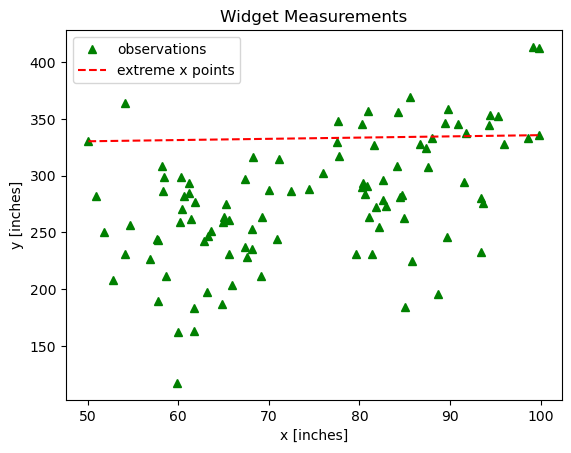

In [4]:
# It's OK to break up your code into multiple cells.
plt.plot(x_value, y_value, 'g^', label = 'observations')
plt.plot([min(x_value), max(x_value)], [y_value[x_value.index(min(x_value))], y_value[x_value.index(max(x_value))]], 'r--', label = 'extreme x points')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')
plt.title('Widget Measurements')
plt.legend()

### Problem 2 - Histogram

In [5]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_hist = pd.read_csv("C:\\Users\Ganesha\Downloads\student_grades.csv")
avg_scores = df_hist.iloc[:, 1].to_list()


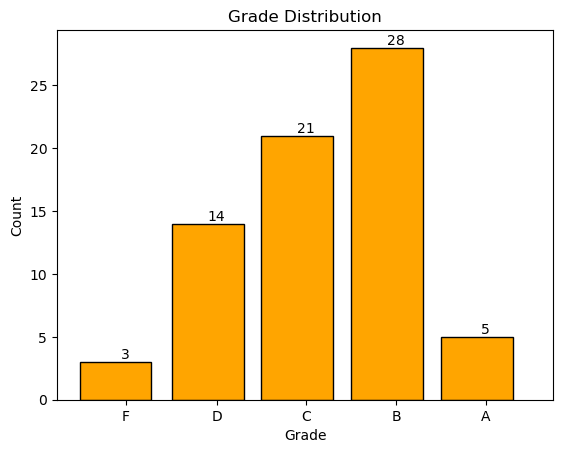

In [6]:
bins = [min(avg_scores),60, 70, 80, 90, 100]
grades = ['F', 'D', 'C', 'B', 'A']


plt.hist(avg_scores, bins=bins, color='orange', edgecolor='black', width=8)

plt.xlabel('Grade')
plt.ylabel('Count')

x_positions = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins)-1)]

plt.xticks(x_positions, grades)

plt.title('Grade Distribution')
hist,_ =np.histogram(avg_scores,bins)
for i,j in zip(x_positions, hist):
  plt.text(i,j,str(j), ha ='center', va ='bottom')

plt.show()

### Problem 3 - Barplot and Boxplot in the Same Figure

In [8]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_solution = pd.read_csv("C:\\Users\Ganesha\Downloads\solution_data.csv")
gap,opt = [], []
problem = list(set(df_solution.iloc[:, 0].to_list()))
for i in range(len(df_solution)):
  if df_solution.iloc[:,1][i] == 'optimal':
    opt.append(df_solution.iloc[:,2][i])
for p in problem:
  for i in range(len(df_solution)):
    if df_solution.iloc[:,0][i] == p:
       val = ((opt[p] - df_solution.iloc[:,2][i])/opt[p]) * 100
       gap.append(val)

df_solution['Optimality Gap'] =gap

df_solution.drop(df_solution[df_solution['SolnMethod'] == 'optimal'].index, inplace=True)



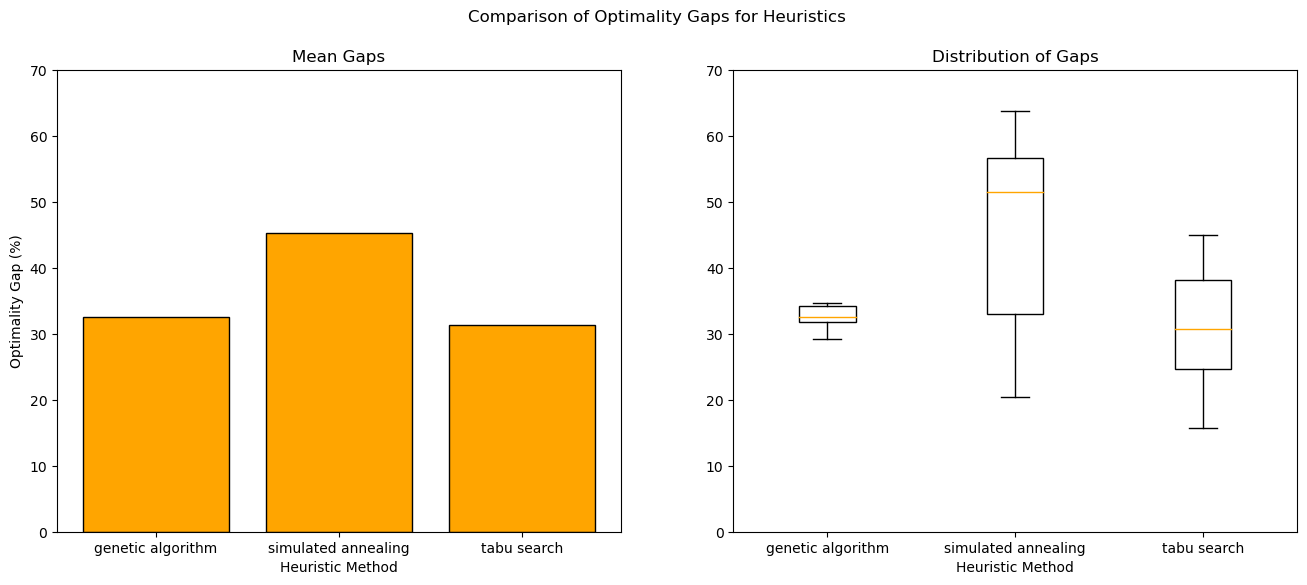

In [9]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

fig.suptitle('Comparison of Optimality Gaps for Heuristics')

ax1.bar(df_solution['SolnMethod'].unique(), df_solution.groupby('SolnMethod')['Optimality Gap'].mean(), color='orange', edgecolor='black')
ax1.set_xlabel('Heuristic Method')
ax1.set_ylabel('Optimality Gap (%)')
ax1.set_title('Mean Gaps')

ax1.set_ylim(0,70)

ax2.boxplot([
    df_solution[df_solution['SolnMethod'] == 'genetic algorithm']['Optimality Gap'],
    df_solution[df_solution['SolnMethod'] == 'simulated annealing']['Optimality Gap'],
    df_solution[df_solution['SolnMethod'] == 'tabu search']['Optimality Gap']
],
    labels=['genetic algorithm', 'simulated annealing', 'tabu search'],
    patch_artist=True,
    medianprops={'color': 'orange'},
    boxprops={'facecolor': 'white'}
)
ax2.set_xlabel('Heuristic Method')
ax2.set_title('Distribution of Gaps')

ax2.set_ylim(0,70)


plt.show()

---
## Part 2 - Explore New Plot Types

[In this space, provide a concise explanation of your plot.  The reader should be able to read this to learn what kind of plot you're about to create, what type of data you're going to plot, and why you believe it is wise to use this type of plot for this type of data.  (replace these instructions with your actual content, and remove the brackets)]

- **URL of Example Code**:  https://seaborn.pydata.org/examples/many_pairwise_correlations.html
- **URL of Sample Data**:  https://data.baltimorecity.gov/datasets/baltimore::part-1-crime-data/explore

In [1]:
# Use "Code" cells to create your plots
# ...



In [23]:
# It's OK to break up your code into multiple cells.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("C:\\Users\Ganesha\Downloads\Part_1_Crime_Data.csv")
print(df)
data_counts = df.groupby(['Description', 'Weapon']).size().unstack(fill_value=0)

C:\Users\Ganesha\AppData\Local\Temp\ipykernel_25404\169204403.py:8: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\Ganesha\Downloads\Part_1_Crime_Data.csv")


                X          Y   RowID  CCNumber           CrimeDateTime  \
0      -76.610023  39.289875       1  23C00366  2023/03/02 02:17:00+00   
1      -76.610023  39.289875       2  23C00366  2023/03/02 02:17:00+00   
2      -76.609676  39.289694       3  23C06833  2023/03/02 00:13:00+00   
3      -76.638088  39.288795       4  23C00663  2023/03/02 20:15:00+00   
4      -76.628442  39.300400       5  23C00667  2023/03/02 22:10:00+00   
...           ...        ...     ...       ...                     ...   
589780 -76.586702  39.223002  589781  17D06759  2017/04/16 20:30:00+00   
589781 -76.654826  39.284016  589782  17D06998  2017/04/16 19:00:00+00   
589782 -76.702554  39.356197  589783  17D06572  2017/04/16 09:55:00+00   
589783 -76.679040  39.336063  589784  17D04047  2017/04/10 08:30:00+00   
589784 -76.550664  39.308144  589785  17D03786  2017/04/10 03:20:00+00   

       CrimeCode     Description Inside_Outside            Weapon   Post  ...  \
0             6F         LARCE

Text(270.72222222222223, 0.5, 'Crime Types')

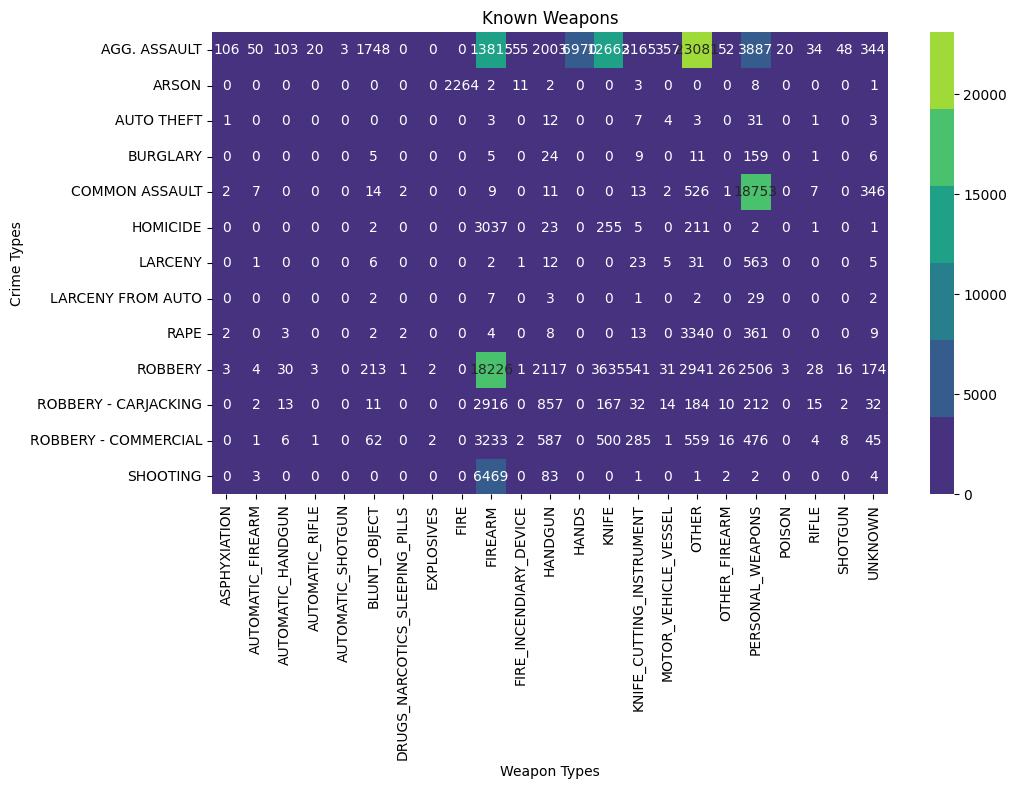

In [5]:
# It's also OK to include comments,
# either in Markdown or as Python code comments.
plt.figure(figsize=(24,6))

# Visualization 1: Heatmap for Known Weapons
plt.subplot(1, 2, 1)
cmap = sns.color_palette("viridis")
sns.heatmap(data_counts, annot=True, cmap=cmap, fmt='d')
plt.title('Known Weapons')
plt.xlabel('Weapon Types')
plt.ylabel('Crime Types')



**Understanding the plot**
The plot reveals several significant insights about the relationship between crime types and the weapons used. Notably, "Firearm" emerges as the most frequently used weapon across various crime types, signaling a concerning prevalence of firearm-related incidents within the dataset. Conversely, "Assault (AD)" exhibits a unique pattern with a wide array of weapon types employed, suggesting that individuals involved in assaults employ diverse means, including firearms, knives, and blunt objects. On the other hand, "Auto Theft" stands out with minimal associations with any weapons, implying that auto thefts typically occur without weapon involvement, highlighting the relatively non-violent nature of this crime type. Meanwhile, "Robbery" and "Aggravated Assault" are identified as crime types most frequently associated with weapon usage, aligning with expectations, as these crimes often involve violence and threats. These observations provide valuable insights for law enforcement, policymakers, and intervention strategies, guiding efforts in areas such as gun control measures, safety precautions, and crime prevention.

**Understanding Code**
Importing Libraries: The code begins by importing necessary Python libraries. NumPy and Seaborn are used for numerical operations and data visualization. Matplotlib is employed for creating plots, while Pandas is utilized for data manipulation and analysis.

Reading Data: The next part of the code reads data from a CSV file named "Part_1_Crime_Data.csv" into a Pandas DataFrame. The data is stored in the variable df.

Data Aggregation: In this section, the code aggregates the data in the DataFrame. It groups the data based on two columns: 'Description' (likely representing crime types) and 'Weapon' (likely representing weapon types). The code then counts the occurrences of each combination of crime and weapon and unstacks the result. Missing values are filled with 0. The outcome is a DataFrame that shows the counts of each weapon type for each crime type.

Creating a Figure: The code creates a new figure for the visualization and specifies a custom figure size of 24 units in width and 6 units in height. This larger figure size is chosen to accommodate the upcoming visualizations.

Visualization 1: Heatmap for Known Weapons: The first subplot in a 1x2 grid of subplots is set up. The heatmap will be placed in this subplot. A heatmap is a graphical representation of data where colors represent values. In this case, it displays the counts of weapon types for each crime type based on the aggregated data. The annot=True parameter indicates that values should be displayed within the cells. The color scheme is defined using the 'YlGnBu' colormap, and values are formatted as integers. The subplot is given the title 'Known Weapons,' and the x and y axes are labeled with 'Weapon Types' and 'Crime Types,' respectively.

sns.color_palette("viridis") specifies the choice of the "viridis" colormap, which is a popular and perceptually uniform sequential colormap. You can replace "viridis" with other sequential colormaps provided by Seaborn or Matplotlib, such as "cividis," "plasma," "inferno," or "magma," to suit your preference.